# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import datetime as dt
import random
from scipy import stats
from citipy import citipy
from scipy.stats import linregress
from pprint import pprint

#from config import api_key

# Import API key
from api_keys import weather_api_key

In [4]:
# Save config information
random_points = 50
rnd_lng = np.random.uniform(-180,180,[random_points])
rnd_lat = np.random.uniform(-90,90,[random_points])

random_latlng = pd.DataFrame({"Latitude": rnd_lat,
                             "Longitude": rnd_lng})

random_latlng.head()

,Latitude,Longitude
0,30.131541,-5.616534
1,43.170537,132.681307
2,7.227252,5.578791
3,49.753863,-115.314035
4,11.307100,-19.038287


In [5]:
citipy.nearest_city(66.350533, 56.074969)

In [6]:
city = []
country = []

for x in range (0, random_points):
    lat = random_latlng.iloc[x]["Latitude"]
    lng = random_latlng.iloc[x]["Longitude"]

    random_city = citipy.nearest_city(lat, lng).city_name
    random_city_country = citipy.nearest_city(lat, lng).country_code
    city.append(random_city)
    country.append(random_city_country)
    
    random_city


In [7]:
random_latlng["City"] = city
random_latlng["Country Code"] = country

random_latlng


,Latitude,Longitude,City,Country Code
0,30.131541,-5.616534,marrakesh,ma
1,43.170537,132.681307,smolyaninovo,ru
2,7.227252,5.578791,owo,ng
3,49.753863,-115.314035,fernie,ca
4,11.307100,-19.038287,oussouye,sn
5,69.227243,87.218710,kayerkan,ru
6,82.968757,-123.709391,tuktoyaktuk,ca
7,-18.252806,-37.897429,caravelas,br
8,-79.594435,92.193313,busselton,au
9,71.237040,156.597259,srednekolymsk,ru


## Generate Cities List

In [8]:
cities_list = []

cities_list.append(random_latlng["City"])

cities_list

[0          marrakesh
 1       smolyaninovo
 2                owo
 3             fernie
 4           oussouye
 5           kayerkan
 6        tuktoyaktuk
 7          caravelas
 8          busselton
 9      srednekolymsk
 10        esmeraldas
 11              hofn
 12           veraval
 13          hermanus
 14           mataura
 15         busselton
 16          victoria
 17              hilo
 18             bluff
 19             vaini
 20           rikitea
 21    chernyshevskiy
 22           mataura
 23            sorvag
 24       new norfolk
 25       east london
 26             bluff
 27         mahebourg
 28            barrow
 29        sogdiondon
 30          cherskiy
 31         geraldton
 32           ushuaia
 33               bud
 34       nizhneyansk
 35           markova
 36            taltal
 37            matiri
 38            kodiak
 39            mehamn
 40          hermanus
 41          sapucaia
 42      umm kaddadah
 43           bubaque
 44           mataura
 45       

In [9]:
cities_clean = random_latlng
cities_clean

,Latitude,Longitude,City,Country Code
0,30.131541,-5.616534,marrakesh,ma
1,43.170537,132.681307,smolyaninovo,ru
2,7.227252,5.578791,owo,ng
3,49.753863,-115.314035,fernie,ca
4,11.307100,-19.038287,oussouye,sn
5,69.227243,87.218710,kayerkan,ru
6,82.968757,-123.709391,tuktoyaktuk,ca
7,-18.252806,-37.897429,caravelas,br
8,-79.594435,92.193313,busselton,au
9,71.237040,156.597259,srednekolymsk,ru


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_keys = weather_api_key

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
lat = []
lng = []
temp = []
temp_min = []
temp_max = []
wind_speed = []
humidity = []
cloudiness = []
city_id = []

    
# Loop through the list of cities and perform a request for data on each
for index, row in cities_clean.iterrows():
    CityStatus = row["City"]
    CountryStatus = row["Country Code"]
    query_url = f"{url}&appid={weather_api_key}&units={units}&q={CityStatus}"
    query_url = f"{url}q={CityStatus},{CountryStatus}&units={units}&appid={weather_api_key}"
    #http://api.openweathermap.org/data/2.5/weather?appid=c5779a215d57f746e1592fcc7f7b17b7&units=metric&q=paris
    response = requests.get(query_url).json()
    
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        temp_max.append(response["main"]["temp_max"])
        temp_min.append(response["main"]["temp_min"])
        wind_speed.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])

        city_id.append(response["id"])
        #city_status_id = responnse["id"]
        print(f"Processeing Record | {CityStatus}, city ID: {city_id[index]}")
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        temp_min.append(np.nan)
        wind_speed.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)

        city_id.append(np.nan)
        print(f"City not found. Skipping {CityStatus}")

#update latitude and longitude to actually match the city
cities_clean["Latitude"] = lat
cities_clean["Longitude"] = lng
cities_clean["Temp"] = temp
cities_clean["Temp Max"] = temp_max
cities_clean["Temp Min"] = temp_min
cities_clean["City ID"] = city_id
cities_clean["Wind Speed"] = wind_speed
cities_clean["Humidity"] = humidity
cities_clean["Cloudiness"] = cloudiness

#set date for when this finished running
date = dt.datetime.today().strftime("%m/%d/%Y")
cities_clean["Date"] = date

Processeing Record | marrakesh, city ID: 2542997
Processeing Record | smolyaninovo, city ID: 2016402
Processeing Record | owo, city ID: 2325314
Processeing Record | fernie, city ID: 5952370
Processeing Record | oussouye, city ID: 2246901
Processeing Record | kayerkan, city ID: 1497337
Processeing Record | tuktoyaktuk, city ID: 6170031
Processeing Record | caravelas, city ID: 3466980
Processeing Record | busselton, city ID: 2075265
Processeing Record | srednekolymsk, city ID: 2121025
Processeing Record | esmeraldas, city ID: 3652065
Processeing Record | hofn, city ID: 2630299
Processeing Record | veraval, city ID: 1253237
Processeing Record | hermanus, city ID: 3366880
City not found. Skipping mataura
Processeing Record | busselton, city ID: 2075265
Processeing Record | victoria, city ID: 241131
Processeing Record | hilo, city ID: 5855927
Processeing Record | bluff, city ID: 2206939
Processeing Record | vaini, city ID: 4032243
Processeing Record | rikitea, city ID: 4030556
Processeing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# set up lists to hold reponse info
cities_clean.to_csv(r'WeatherPY_Cities_Clean_DF.csv', index = False)
cities_clean


,Latitude,Longitude,City,Country Code,Temp,Temp Max,Temp Min,City ID,Wind Speed,Humidity,Cloudiness,Date
0,31.6315,-8.0083,marrakesh,ma,102.27,102.27,102.27,2542997.0,6.91,21.0,40.0,07/21/2021
1,43.2956,132.4675,smolyaninovo,ru,72.86,72.86,72.86,2016402.0,2.55,97.0,18.0,07/21/2021
2,7.1962,5.5868,owo,ng,71.53,71.53,71.53,2325314.0,5.59,96.0,98.0,07/21/2021
3,49.5000,-115.0687,fernie,ca,73.83,75.29,73.60,5952370.0,6.53,30.0,15.0,07/21/2021
4,12.4850,-16.5469,oussouye,sn,86.09,91.58,86.09,2246901.0,9.31,68.0,100.0,07/21/2021
5,69.3497,87.7602,kayerkan,ru,54.95,54.95,54.95,1497337.0,6.02,57.0,33.0,07/21/2021
6,69.4541,-133.0374,tuktoyaktuk,ca,77.00,77.00,77.00,6170031.0,8.05,50.0,20.0,07/21/2021
7,-17.7125,-39.2481,caravelas,br,75.88,75.88,75.88,3466980.0,7.43,54.0,52.0,07/21/2021
8,-33.6500,115.3333,busselton,au,51.04,51.04,47.08,2075265.0,7.65,82.0,85.0,07/21/2021
9,67.4500,153.6833,srednekolymsk,ru,54.95,54.95,54.95,2121025.0,4.03,85.0,41.0,07/21/2021


In [12]:
cities_clean.describe()

,Latitude,Longitude,Temp,Temp Max,Temp Min,City ID,Wind Speed,Humidity,Cloudiness
count,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000,44.000000,44.000000
mean,6.923914,12.672777,63.270455,64.265455,62.643636,2.780651e+06,9.731818,71.477273,56.386364
std,41.640477,102.407765,15.970374,16.152120,16.429230,1.735088e+06,6.791515,19.628513,37.014275
min,-54.800000,-175.200000,33.460000,35.220000,33.460000,2.411310e+05,1.010000,21.000000,0.000000
25%,-30.628800,-55.437500,51.040000,51.040000,47.080000,2.021702e+06,4.575000,62.500000,20.000000
50%,1.670800,19.637400,59.900000,61.595000,59.675000,2.226920e+06,7.760000,76.500000,56.500000
75%,50.178300,106.271900,74.342500,76.025000,74.170000,3.697390e+06,13.310000,84.250000,90.500000
max,71.290600,168.333300,102.270000,102.270000,102.270000,7.626370e+06,27.630000,100.000000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
humidity_threshold = 100

cities_filtered_humidity = cities_clean[cities_clean['Humidity'] < humidity_threshold]
cities_filtered_humidity

,Latitude,Longitude,City,Country Code,Temp,Temp Max,Temp Min,City ID,Wind Speed,Humidity,Cloudiness,Date
0,31.6315,-8.0083,marrakesh,ma,102.27,102.27,102.27,2542997.0,6.91,21.0,40.0,07/21/2021
1,43.2956,132.4675,smolyaninovo,ru,72.86,72.86,72.86,2016402.0,2.55,97.0,18.0,07/21/2021
2,7.1962,5.5868,owo,ng,71.53,71.53,71.53,2325314.0,5.59,96.0,98.0,07/21/2021
3,49.5000,-115.0687,fernie,ca,73.83,75.29,73.60,5952370.0,6.53,30.0,15.0,07/21/2021
4,12.4850,-16.5469,oussouye,sn,86.09,91.58,86.09,2246901.0,9.31,68.0,100.0,07/21/2021
5,69.3497,87.7602,kayerkan,ru,54.95,54.95,54.95,1497337.0,6.02,57.0,33.0,07/21/2021
6,69.4541,-133.0374,tuktoyaktuk,ca,77.00,77.00,77.00,6170031.0,8.05,50.0,20.0,07/21/2021
7,-17.7125,-39.2481,caravelas,br,75.88,75.88,75.88,3466980.0,7.43,54.0,52.0,07/21/2021
8,-33.6500,115.3333,busselton,au,51.04,51.04,47.08,2075265.0,7.65,82.0,85.0,07/21/2021
9,67.4500,153.6833,srednekolymsk,ru,54.95,54.95,54.95,2121025.0,4.03,85.0,41.0,07/21/2021


In [14]:
#  Get the indices of cities that have humidity over 100%.
index = cities_clean.index

condition = cities_clean["Humidity"] >= humidity_threshold

high_humidity_indicies = index[condition]

high_humidity_indicies_list = high_humidity_indicies.tolist()


print(high_humidity_indicies_list)

[35]


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [16]:
index = high_humidity_indicies_list

clean_city_data =cities_clean.drop(labels=None, axis=0, index=index, columns=None, level=None, inplace=False, errors='raise')

clean_city_data


,Latitude,Longitude,City,Country Code,Temp,Temp Max,Temp Min,City ID,Wind Speed,Humidity,Cloudiness,Date
0,31.6315,-8.0083,marrakesh,ma,102.27,102.27,102.27,2542997.0,6.91,21.0,40.0,07/21/2021
1,43.2956,132.4675,smolyaninovo,ru,72.86,72.86,72.86,2016402.0,2.55,97.0,18.0,07/21/2021
2,7.1962,5.5868,owo,ng,71.53,71.53,71.53,2325314.0,5.59,96.0,98.0,07/21/2021
3,49.5000,-115.0687,fernie,ca,73.83,75.29,73.60,5952370.0,6.53,30.0,15.0,07/21/2021
4,12.4850,-16.5469,oussouye,sn,86.09,91.58,86.09,2246901.0,9.31,68.0,100.0,07/21/2021
5,69.3497,87.7602,kayerkan,ru,54.95,54.95,54.95,1497337.0,6.02,57.0,33.0,07/21/2021
6,69.4541,-133.0374,tuktoyaktuk,ca,77.00,77.00,77.00,6170031.0,8.05,50.0,20.0,07/21/2021
7,-17.7125,-39.2481,caravelas,br,75.88,75.88,75.88,3466980.0,7.43,54.0,52.0,07/21/2021
8,-33.6500,115.3333,busselton,au,51.04,51.04,47.08,2075265.0,7.65,82.0,85.0,07/21/2021
9,67.4500,153.6833,srednekolymsk,ru,54.95,54.95,54.95,2121025.0,4.03,85.0,41.0,07/21/2021


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

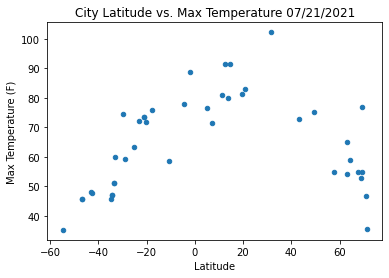

In [17]:
graph_date = clean_city_data["Date"][1]

Lat_Max_Temp = clean_city_data.plot.scatter(x = "Latitude", y = "Temp Max", 
                                            title = "City Latitude vs. Max Temperature " +str(graph_date))

plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

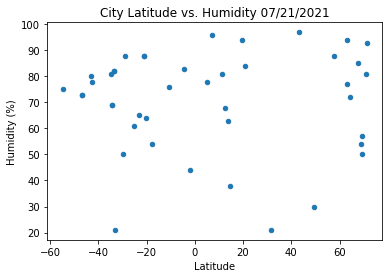

In [18]:
graph_date = clean_city_data["Date"][1]

Lat_Humidity = clean_city_data.plot.scatter(x = "Latitude", y = "Humidity",
                                            title = "City Latitude vs. Humidity " +str(graph_date))

plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

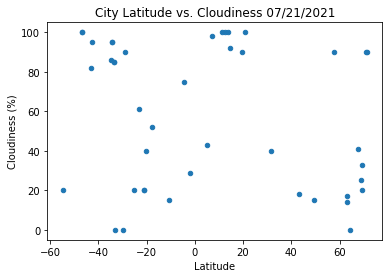

In [19]:
graph_date = clean_city_data["Date"][1]

Lat_Cloudiness = clean_city_data.plot.scatter(x = "Latitude", y = "Cloudiness", 
                                            title = "City Latitude vs. Cloudiness " +str(graph_date))

plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

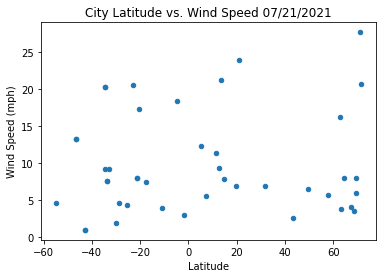

In [20]:
graph_date = clean_city_data["Date"][1]

Lat_Wind_Speed = clean_city_data.plot.scatter(x = "Latitude", y = "Wind Speed", 
                                            title = "City Latitude vs. Wind Speed " +str(graph_date))

plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [21]:
NHem = cities_clean[cities_clean['Latitude'] > 0]
SHem = cities_clean[cities_clean['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5745094348985287


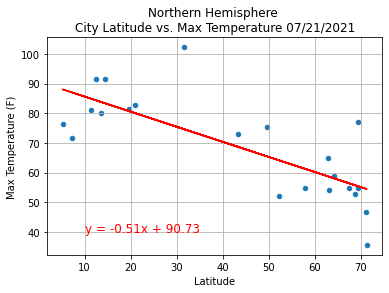

In [22]:
graph_date = cities_clean["Date"][1]

NHem_Lat_Max_Temp = NHem.plot.scatter(x = "Latitude", y = "Temp Max", 
                                            title = "Northern Hemisphere \nCity Latitude vs. Max Temperature " +str(graph_date))

plt.ylabel("Max Temperature (F)")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(NHem["Latitude"], 
                                                            NHem["Temp Max"])

regress_values = NHem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=12,color="red")
plt.grid(True)
print(f"The r-value is: {rvalue**2}")
print
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.75462320193007


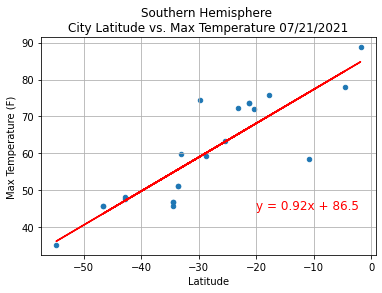

In [23]:
graph_date = cities_clean["Date"][1]

SHem_Lat_Max_Temp = SHem.plot.scatter(x = "Latitude", y = "Temp Max", 
                                            title = "Southern Hemisphere \nCity Latitude vs. Max Temperature " +str(graph_date))

plt.ylabel("Max Temperature (F)")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(SHem["Latitude"], 
                                                            SHem["Temp Max"])

regress_values = SHem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-20,45),fontsize=12,color="red")
plt.grid(True)
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0005337103690779061


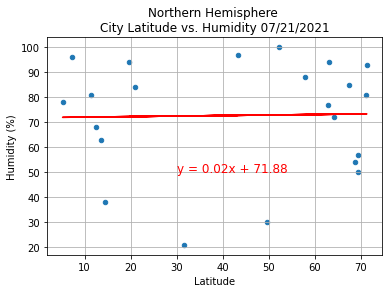

In [24]:
graph_date = cities_clean["Date"][1]

NHem_Lat_Max_Temp = NHem.plot.scatter(x = "Latitude", y = "Humidity", 
                                            title = "Northern Hemisphere \nCity Latitude vs. Humidity " +str(graph_date))

plt.ylabel("Humidity (%)")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(NHem["Latitude"], 
                                                            NHem["Humidity"])

regress_values = NHem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=12,color="red")
plt.grid(True)
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02368108204760125


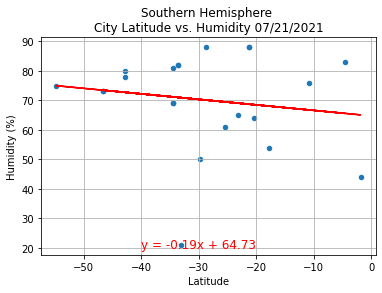

In [25]:
graph_date = cities_clean["Date"][1]

SHem.plot.scatter(x = "Latitude", y = "Humidity", 
                                            title = "Southern Hemisphere \nCity Latitude vs. Humidity " +str(graph_date))

plt.ylabel("Humidity (%)")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(SHem["Latitude"], 
                                                            SHem["Humidity"])

regress_values = SHem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=12,color="red")
plt.grid(True)
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3180222788618309


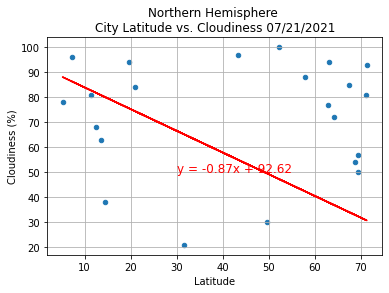

In [26]:
graph_date = cities_clean["Date"][1]

NHem.plot.scatter(x = "Latitude", y = "Humidity", 
                                            title = "Northern Hemisphere \nCity Latitude vs. Cloudiness " +str(graph_date))

plt.ylabel("Cloudiness (%)")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(NHem["Latitude"], 
                                                            NHem["Cloudiness"])

regress_values = NHem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=12,color="red")
plt.grid(True)
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14851258682311372


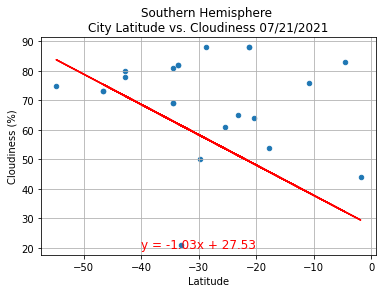

In [27]:
graph_date = cities_clean["Date"][1]

SHem.plot.scatter(x = "Latitude", y = "Humidity", 
                                            title = "Southern Hemisphere \nCity Latitude vs. Cloudiness " +str(graph_date))

plt.ylabel("Cloudiness (%)")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(SHem["Latitude"], 
                                                            SHem["Cloudiness"])

regress_values = SHem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=12,color="red")
plt.grid(True)
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005057266337034384


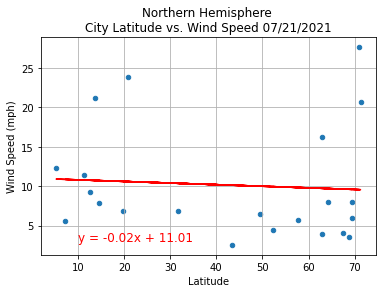

In [28]:
graph_date = cities_clean["Date"][1]

NHem.plot.scatter(x = "Latitude", y = "Wind Speed", 
                                            title = "Northern Hemisphere \nCity Latitude vs. Wind Speed " +str(graph_date))

plt.ylabel("Wind Speed (mph)")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(NHem["Latitude"], 
                                                            NHem["Wind Speed"])

regress_values = NHem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(10,3),fontsize=12,color="red")
plt.grid(True)
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005773271081936492


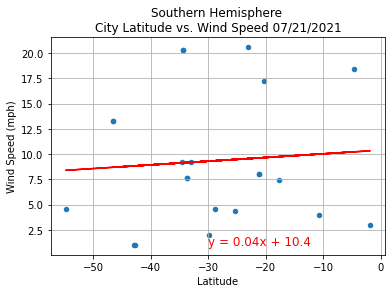

In [29]:
graph_date = cities_clean["Date"][1]

SHem.plot.scatter(x = "Latitude", y = "Wind Speed", 
                                            title = "Southern Hemisphere \nCity Latitude vs. Wind Speed " +str(graph_date))

plt.ylabel("Wind Speed (mph)")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(SHem["Latitude"], 
                                                            SHem["Wind Speed"])

regress_values = SHem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-30,1),fontsize=12,color="red")
plt.grid(True)
print(f"The r-value is: {rvalue**2}")
plt.show()

In [36]:
cities_filtered_humidity.to_csv(r'weather_df.csv', index = False)